In [65]:
import time
from keras import Model

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
from keras_pandas import lib
from keras_pandas.Automater import Automater

In [48]:
from keras.layers import Dense

In [49]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [50]:
# fix random seed for reproducibility
import numpy
seed = 7
numpy.random.seed(seed)
from keras.optimizers import Nadam
from keras.optimizers import adam
from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

In [51]:
CSV_PATH2 = ('./input/components-a2.csv')

#dataset = tf.contrib.data.make_csv_dataset(CSV_PATH, batch_size=32)
data = pd.read_csv(CSV_PATH2,encoding="utf-8",decimal=',')#, header=None dtype="unicode"
data.head()
#cp1252 utf-8

,ProdNbr_c,Commodity_c,FunctionDesignation_c,ProdName_c,ProdNetWeight_n,ProdNetWeightNbr_n,ManId_c,ManDesignation_c,MC_n,ManStatus_c,...,SupplierManufacturingRisk_n,SupplierAggregatedRisk_n,CommercialAggregatedRisk_n,TechnicalAggregatedRisk_n,RecoveryTimeweeks_n,Rampuptimetofullproductionfromfirstdeliveryweeks_n,MRPVol_n,AvgPriceLatestYearUSD_n,Volume_n,target_c
0,0,6,317,0,42.0,10.0,25,422,1,1,...,2.0,1.0,1.0,1.0,6.0,10.0,0,0.24969,1776.0,4
1,0,6,317,0,42.0,10.0,27,422,1,1,...,0,0,0,0,0,0,0,0.24969,0,4
2,1,6,47,5,973.0,1000.0,11,168,1,1,...,0,0,0,0,0,0,0,0,0,3
3,2,6,392,15,972.0,100.0,9,322,1,1,...,3.0,3.0,3.0,3.0,26.0,6.0,67312.0,5.1466199999999995,68510.0,4
4,3,6,1,24,1.0,1.0,48,602,1,1,...,0,0,0,0,0,0,0,0,0,4


In [52]:
# Load data
#observations = lib.load_lending_club(CSV_PATH2)
observations = data
# Train /test split
train_observations, test_observations = train_test_split(observations)
train_observations = train_observations.copy()
test_observations = test_observations.copy()

# List out variable types

data_type_dict = {'numerical': ['ProdNetWeight_n', 'ProdNetWeightNbr_n','MaxSolderingTemp_n','ASGId_n','LeadTime_n',
                                'LeadTimewithForecast_n','RecoveryTimeweeks_n',
                                'Rampuptimetofullproductionfromfirstdeliveryweeks_n','MRPVol_n',
                   'AvgPriceLatestYearUSD_n','Volume_n'],
                  
                  'categorical': ['ProdNbr_c','FunctionDesignation_c','Commodity_c','ProdName_c', 'MC_n','ManStatus_c','target_c','SupplierManufacturingRisk_n','SupplierAggregatedRisk_n',
                                'CommercialAggregatedRisk_n','TechnicalAggregatedRisk_n']}
                  #'text': [ 'FunctionDesignation_c']} , 'ROHSStatus_c', 'SolderingProcess_c',Unique_c
                                  #'SupplierCSLStatus_c'
output_var = 'target_c'
#'text': ['ProdNbr_c', 'FunctionDesignation_c']}

In [66]:
%%time
# Create and fit Automater
auto = Automater(data_type_dict=data_type_dict, output_var=output_var)
auto.fit(train_observations)
# Transform data
train_X, train_y = auto.fit_transform(train_observations)
test_X, test_y = auto.transform(test_observations)

# Create and fit keras (deep learning) model.

x = auto.input_nub
x = Dense(10)(x)
x = Dense(10)(x)
x = auto.output_nub(x)
optimizer = adam()
model = Model(inputs=auto.input_layers, outputs=x)

model.compile(optimizer=optimizer, loss=auto.suggest_loss(), metrics=['accuracy'])

history = model.fit(train_X, train_y, validation_data=(test_X,test_y), epochs=10)

Train on 598 samples, validate on 200 samples
Epoch 1/10
598/598 [==============================] - ETA: 19s - loss: 1.8404 - acc: 0.28 - 1s 2ms/step - loss: 1.7587 - acc: 0.2893 - val_loss: 1.6313 - val_acc: 0.2850
Epoch 2/10
598/598 [==============================] - ETA: 0s - loss: 1.5391 - acc: 0.437 - 0s 75us/step - loss: 1.5387 - acc: 0.4816 - val_loss: 1.4643 - val_acc: 0.4600
Epoch 3/10
598/598 [==============================] - ETA: 0s - loss: 1.4459 - acc: 0.625 - 0s 70us/step - loss: 1.3116 - acc: 0.6338 - val_loss: 1.2849 - val_acc: 0.5750
Epoch 4/10
598/598 [==============================] - ETA: 0s - loss: 1.0295 - acc: 0.843 - 0s 68us/step - loss: 1.0634 - acc: 0.7358 - val_loss: 1.1063 - val_acc: 0.6500
Epoch 5/10
598/598 [==============================] - ETA: 0s - loss: 0.7964 - acc: 0.875 - 0s 70us/step - loss: 0.7993 - acc: 0.8696 - val_loss: 0.9376 - val_acc: 0.7050
Epoch 6/10
598/598 [==============================] - ETA: 0s - loss: 0.5845 - acc: 0.937 - 0s 68us/

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


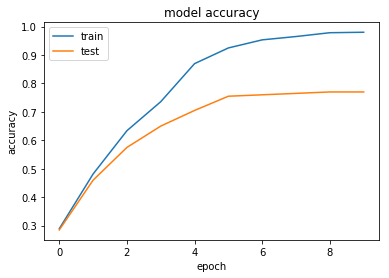

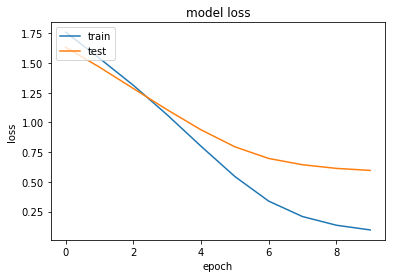

In [67]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
%%time
# Make model predictions and inverse transform model predictions, to get usable results

pred_test_y = model.predict(test_X)   

Wall time: 326 ms


In [70]:
Predicted = auto.inverse_transform_output(pred_test_y)

In [71]:
df2 = test_observations.assign(Predicted = (Predicted))#, index=test_observations.index)

In [72]:
viewdf = df2.iloc[: , [0, 2,25,26]]
viewdf

,ProdNbr_c,FunctionDesignation_c,target_c,Predicted
515,291,60,2,2
794,458,10,3,3
289,152,198,4,3
620,345,144,4,3
411,220,36,2,2
355,195,185,2,2
153,81,180,3,3
138,73,333,1,1
110,60,290,4,4
786,451,39,4,3
